# NN

## Prepare execution

### Imports

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix

2025-07-01 17:41:51.827794: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751384511.842953   10473 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751384511.847605   10473 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1751384511.858953   10473 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1751384511.858969   10473 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1751384511.858971   10473 computation_placer.cc:177] computation placer alr

### Load both datasets

In [2]:
train_df = pd.read_csv('../data/loan_data_prepared_train.csv')
test_df = pd.read_csv('../data/loan_data_prepared_test.csv')

### Goal Column

In [3]:
target_col = 'loan_status'

### Split X and Y

In [4]:
X_train = train_df.drop(columns=[target_col])
y_train = train_df[target_col]

X_test = test_df.drop(columns=[target_col])
y_test = test_df[target_col]

## Train Model

### Create NN model

In [5]:
model = Sequential([
    Dense(64, activation='sigmoid', input_shape=(X_train.shape[1],)),
    Dense(64, activation='sigmoid'),
    Dense(1, activation='sigmoid') 
])

/home/ced/src/ml-models-comparison/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-07-01 17:42:03.170734: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-07-01 17:42:03.170755: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:167] env: CUDA_VISIBLE_DEVICES="-1"
2025-07-01 17:42:03.170759: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:170] CUDA_VISIBLE_DEVICES is set to -1 - this hides all GPUs from CUDA
2025-07-01 17:42:03.170763: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:178] verbose logging is disabl

### Compile model

In [6]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Fit model

In [13]:
model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=1)

Epoch 1/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 808us/step - accuracy: 0.9126 - loss: 0.1872
Epoch 2/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 928us/step - accuracy: 0.9163 - loss: 0.1862
Epoch 3/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 902us/step - accuracy: 0.9144 - loss: 0.1856
Epoch 4/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9166 - loss: 0.1832
Epoch 5/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 988us/step - accuracy: 0.9159 - loss: 0.1822
Epoch 6/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 827us/step - accuracy: 0.9179 - loss: 0.1788
Epoch 7/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 847us/step - accuracy: 0.9195 - loss: 0.1785
Epoch 8/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 843us/step - accuracy: 0.9185 - loss: 0.1769
Epoch 9/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9171 - loss: 0.1807  
Epoch 10/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 834us/step - accuracy: 0.9141 - loss: 0.1848
Epoch 11/30
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 999us/step - accuracy: 0.9192 - loss: 0.1806
Epoch 12/3

## Test

### Predict output

In [14]:
y_pred = model.predict(X_test)
y_pred_binary = (y_pred >= 0.5).astype(int).flatten()

282/282 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step


### Evaluate model on test data

In [15]:
print("Accuracy:", round(accuracy_score(y_test, y_pred_binary), 3))

Accuracy: 0.921


### Display Confusion Matrix

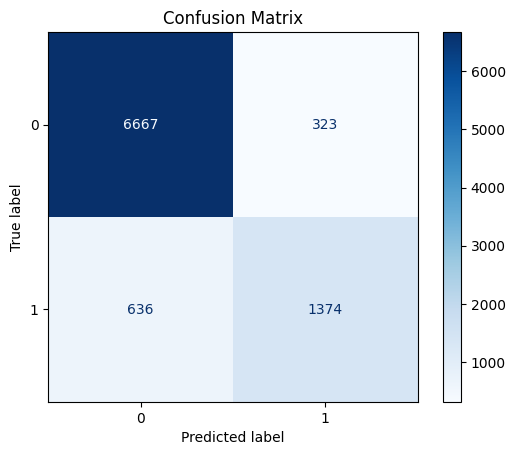

In [47]:
cm = confusion_matrix(y_test, y_pred_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()